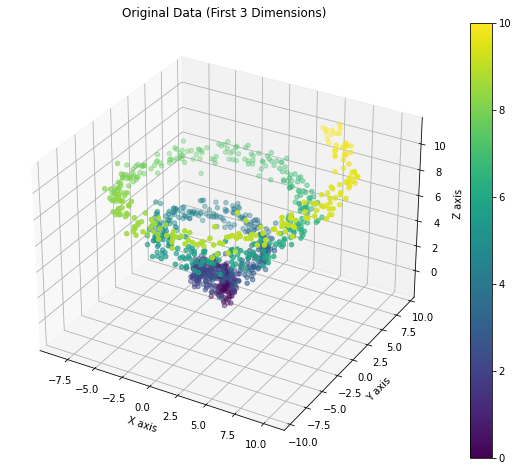

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate Data
# Create a 3D spiral with noise and additional correlated dimensions
n_points = 1000

# Generate spiral parameters
t = np.linspace(0, 10, n_points)
noise = 0.5

# Create spiral in 3D
x = t * np.cos(2*t) + np.random.normal(0, noise, n_points)
y = t * np.sin(2*t) + np.random.normal(0, noise, n_points)
z = t + np.random.normal(0, noise, n_points)

# Add two more correlated dimensions
w = 0.3*x + 0.5*y + np.random.normal(0, noise, n_points)
v = 0.2*z + 0.4*x + np.random.normal(0, noise, n_points)

# Combine into a matrix
X = np.column_stack([x, y, z, w, v])

# Plot original 3D data (using first 3 dimensions)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=t, cmap='viridis')
plt.colorbar(scatter)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Original Data (First 3 Dimensions)')
plt.show()



Data Matrix Shape: (1000, 5)

First few rows of the data matrix:
[[ 0.24835708  0.69967772 -0.33758914 -0.5295578  -0.3999218 ]
 [-0.05912415  0.46251723 -0.06224933 -0.21667114 -0.05170127]
 [ 0.34384824  0.03061657 -0.37618994 -0.08834001  0.07130975]
 [ 0.79149081 -0.32166587 -0.12395073  1.02045814  0.52812135]
 [-0.07716496  0.35231464 -0.90676729  0.43128439 -0.89564863]]

Covariance Matrix:


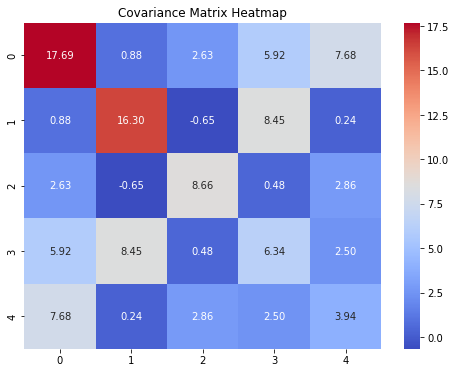

In [6]:
# 2. Data Analysis and Matrix Operations
print("Data Matrix Shape:", X.shape)
print("\nFirst few rows of the data matrix:")
print(X[:5])

# Compute mean and center the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)
print("\nCovariance Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()


Singular Values:
[161.37634721 136.06187119  88.95065906  14.73172362  13.51828607]


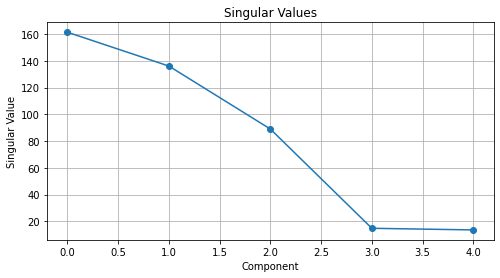

In [7]:
# 3. Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(X_centered)

print("\nSingular Values:")
print(S)

# Plot singular values
plt.figure(figsize=(8, 4))
plt.plot(S, 'o-')
plt.title('Singular Values')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

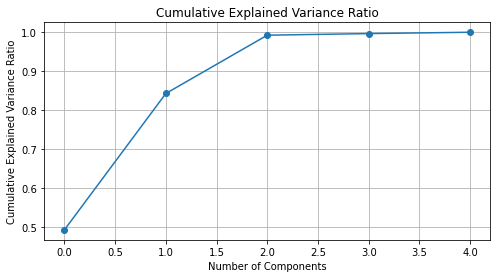


Explained variance ratio by component:
PC1: 0.493 (49.3%)
PC2: 0.350 (35.0%)
PC3: 0.150 (15.0%)
PC4: 0.004 (0.4%)
PC5: 0.003 (0.3%)


In [8]:
# 4. Principal Component Analysis
pca = PCA()
X_pca = pca.fit_transform(X_centered)

# Plot explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

print("\nExplained variance ratio by component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

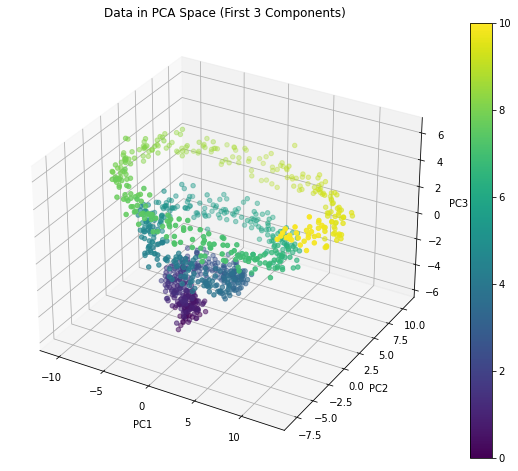

In [9]:
# 5. Visualization of PCA Results
# Plot first 3 principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                    c=t, cmap='viridis')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Data in PCA Space (First 3 Components)')
plt.show()

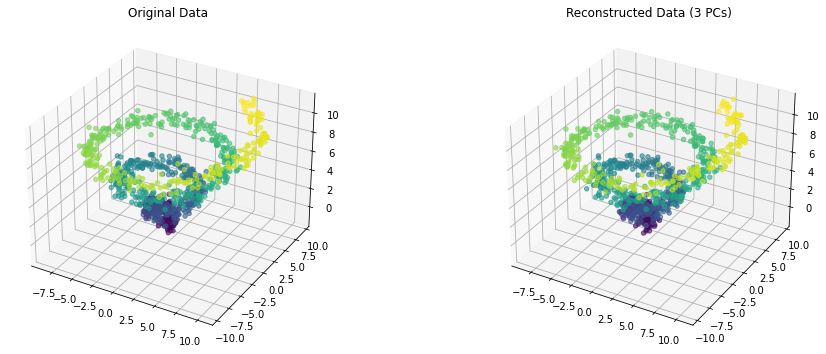


Reconstruction MSE: 0.0800


In [10]:
# 6. Compare original and PCA-reconstructed data
# Reconstruct using first 3 components
X_reconstructed = np.dot(X_pca[:, :3], pca.components_[:3, :]) + X_mean

# Plot original vs reconstructed (first 3 dimensions)
fig = plt.figure(figsize=(15, 5))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis', alpha=0.6)
ax1.set_title('Original Data')

# Reconstructed data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], 
            X_reconstructed[:, 2], c=t, cmap='viridis', alpha=0.6)
ax2.set_title('Reconstructed Data (3 PCs)')

plt.tight_layout()
plt.show()

# Calculate and print reconstruction error
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"\nReconstruction MSE: {reconstruction_error:.4f}")